In [ ]:
!pip install opencv-python matplotlib numpy


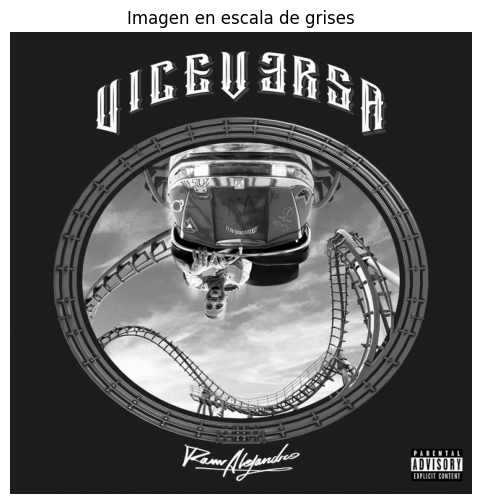

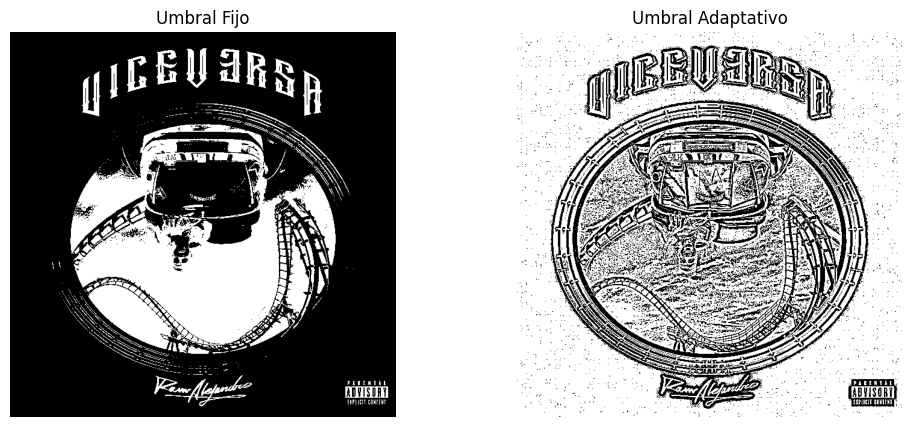

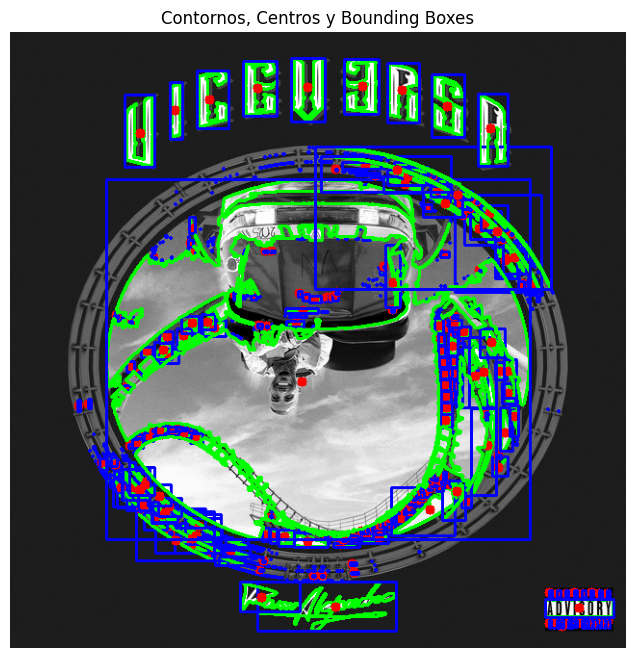

Número de formas detectadas: 608
Área promedio: 166.53
Perímetro promedio: 34.80


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen en escala de grises
img_gray = cv2.imread('rauw.jpeg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.title("Imagen en escala de grises")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

# 2. Umbral fijo
_, binary_fixed = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# 3. Umbral adaptativo
binary_adaptive = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2)

# Mostrar ambas binarizaciones
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(binary_fixed, cmap='gray')
axs[0].set_title("Umbral Fijo")
axs[0].axis('off')
axs[1].imshow(binary_adaptive, cmap='gray')
axs[1].set_title("Umbral Adaptativo")
axs[1].axis('off')
plt.show()

# 4. Detección de contornos en imagen umbral fija
contours, _ = cv2.findContours(binary_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copia a color para dibujar
img_contours = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

areas = []
perimeters = []

# 5. Dibujar contornos y métricas
for cnt in contours:
    # Dibujar contorno
    cv2.drawContours(img_contours, [cnt], -1, (0, 255, 0), 2)

    # Calcular momentos y centro de masa
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.circle(img_contours, (cx, cy), 5, (0, 0, 255), -1)

    # Bounding box
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_contours, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Métricas
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    areas.append(area)
    perimeters.append(perimeter)

# 6. Mostrar la imagen con anotaciones
plt.figure(figsize=(8, 8))
plt.title("Contornos, Centros y Bounding Boxes")
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 7. Métricas generales
num_shapes = len(contours)
avg_area = np.mean(areas) if areas else 0
avg_perimeter = np.mean(perimeters) if perimeters else 0

print(f"Número de formas detectadas: {num_shapes}")
print(f"Área promedio: {avg_area:.2f}")
print(f"Perímetro promedio: {avg_perimeter:.2f}")